(chapters:appendix)=
# Appendix
In this page we can find further development of concepts used in previous chapters.

(appendix:violinplot)=
## 1. Violin Plots

Violin plots are a powerful tool that puts together the information from *Box plots* and *KDE Plots*.

### 1.1. Example

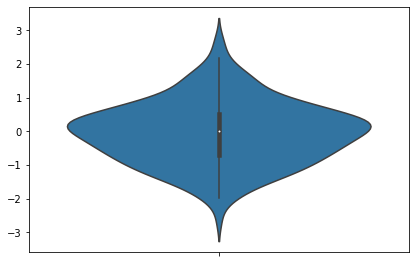

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(42)
x = np.random.normal(loc=0.0, scale=1.0, size=200)

fig, ax = plt.subplots(1, 1)
plt.tight_layout()

sns.violinplot(y=x, ax=ax, whis=1.5)

plt.show()

As we already said, a Violin plot is the combination of box plots and kde plots. Let's have a look at them first.

### 1.2. Building Blocks

#### 1.2.1. Box Plots

Box plots are used to depict numerical data through their quartiles.

##### 1.2.1.1. example

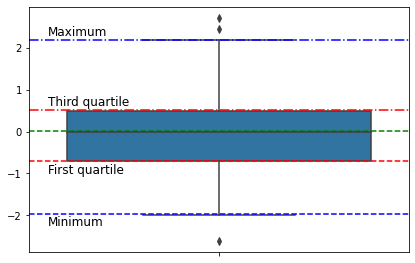

In [2]:
np.random.seed(42)
x = np.random.normal(loc=0.0, scale=1.0, size=200)

fig, ax = plt.subplots(1, 1)
plt.tight_layout()

sns.boxplot(y=x, ax=ax, whis=1.5)

# Median and quartiles
med = sorted(x)[len(x)//2]
fq = sorted(x)[len(x)//4]
tq = sorted(x)[len(x)//4*3]

# Inter-quaritles range
iqr = tq - fq

# Minimum and maximum
mmin = sorted(x)[int(np.floor(tq + iqr*1.5))]
mmax = sorted(x)[int(np.floor(fq - iqr*1.5))]

# Lines with text
ax.axhline(fq, ls='--', color='r', label='First quartile')
ax.text(-0.45, fq - 0.3, "First quartile", fontsize=12)
ax.axhline(tq, ls='-.', color='r', label='Third quartile')
ax.text(-0.45, tq + 0.1, "Third quartile", fontsize=12)

ax.axhline(med, ls='--', color='g', label='Median')

ax.axhline(mmin, ls='--', color='b', label='Minimum')
ax.text(-0.45, mmin - 0.3, "Minimum", fontsize=12)
ax.axhline(mmax, ls='-.', color='b', label='Maximum')
ax.text(-0.45, mmax + 0.1, "Maximum", fontsize=12)

plt.show()

##### 1.2.1.2. Building blocks

The main concept behind this representation is the *Percentile*:

*A percentile is a score below which falls a given percentage of the data*

$
  P_n = \frac{n}{100}N
$

where:
* $n$ is the desired percentile
* $N$ is the total number of observation


The components needed to build this kind of plot are:

1. **First Quartile ($P_{25}$)**: *Median* of the *lower half* of the dataset.
2. **Second Quartile ($P_{75}$)**: *Median* of the *upper half* of the dataset.
3. **Inter-Quartile Range ($P_{75}$ - $P_{25}$)**: Distance *between* the *thrid* and the *first* quartile
4. **Minimum ($P_{25} - 1.5\, \text{IQR}$)**: 1.5 times the *IQR below the first* quartile
5. **Maximum ($P_{75} + 1.5\, \text{IQR}$)**: 1.5 times the *IQR above the thrid* quartile
6. **Outliers**: Any point falling *above the maximum* and *below the minimum*

##### 1.2.1.3. Usage and Interpretation

The best feature of box plots is that they sum the data distribution with only 5 values (First/Second/Thrid Quartile, Maximum and Minimum). They give a clear, although rough understanding of the distribution of our data.

#### 1.2.2. KDE Plots

Kernel Density Estimation Plots represent an **estimated probability density function** based on a finite data sample.

##### 1.2.2.1. Example

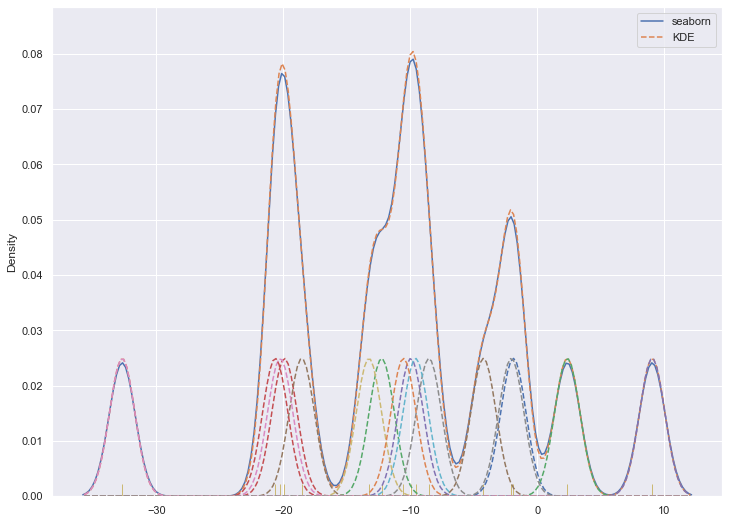

In [3]:
from scipy.stats import norm
import scipy as sp

sns.set_theme()

# generate sample data
np.random.seed(42)

data = []
underlying_distrib = np.random.normal(-10, 7, 300)
data.extend(np.random.choice(underlying_distrib[:150], 8))
data.extend(np.random.choice(underlying_distrib[-150:], 8))

samples = 200

# bandwidth parameter (standard deviation of each kernel)
bandwidth=1

# grid points
xmin = min(data) - 3 * bandwidth
xmax = max(data) + 3 * bandwidth
x = np.linspace(xmin, xmax, samples)

# compute KDE by hand
kde = np.zeros(samples)

kdes = []
for val in data:
    kdes.append(norm.pdf(x, loc=val, scale=bandwidth))
kde = np.sum(kdes, axis=0)

# normalize
norm_fact = sp.integrate.simps(kde, x)
kde /= norm_fact


# plot computed kde

# in scipy, the bandwidth is scaled by the standard deviation.
# In order to be able to compare our implementation with scipy's, we must
# divide the bandwidth by the standard deviation of the sample.
bandwidth=1/np.std(data)

plt.figure(figsize=(12, 9))
ax = sns.kdeplot(data, label="seaborn", bw_method=bandwidth)
sns.lineplot(x=x, y=kde, label="KDE", ax=ax)

# plot single kernels
for kd in kdes:
    # https://gsalvatovallverdu.gitlab.io/python/kernel_density_estimation/
    sns.lineplot(x=x, y=kd/norm_fact, ax=ax, palette="Paired")

for line in ax.lines[1:]:
    line.set_linestyle("--")

# plot sample data
sns.rugplot(data, ax=ax, palette="Paired")

plt.legend();
plt.show()

##### 1.2.2.2. Building blocks

Kernel Density Estimate is a procedure used to estimate a density function, starting from a sample, originated from an unknown underlying distribution.
In order to build such estimated density function, we must chose an appropriate **kernel**.
We can choose among many different kernels, in our explanation we will use the normal kernel.
The following equation shows how we build the KDE:

$$ {\displaystyle {\widehat {f}}_{h}(x)={\frac {1}{m}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )},} $$

Where:
* $K$ is the Gaussian kernel centered in a given point $x_i$
* $h$ is the *bandwidth* of the kernel (the standard deviation). This parameter influences the smoothness of the estimated function.
* $m$ is a scaling factor. Seaborn's implementation of KDE uses the integral of the sum of the kernels as the scaling factor.

From an intuitive point of view, we are centering a Gaussian distribution in each of our sample points, and calling the sum of such distributions our KDE.

##### 1.2.2.3. Usage and Interpretation
KDE plots give a powerful representation of what we expect to be the underlying distribution of our sample data.
It is a non-parametric method, meaning that we do not need strong assumptions on the unknown distribution, but it is very sensible on the choice of bandwidth, and the amount of data.

### 1.3. Usage and Interpretation
The Violin plot puts together the information of the Box and the KDE, making it more even more powerful information-wise.
The side effect is that it requires a deeper understanding in order to read it correctly, and so it can be intimidating, making it less common.

All these plots are commonly used to show differences among populations.


(appendix:chi-squared)=
## 2. Pearson's $\chi^2$ test for Statistical Independence
The chi-squared test is a statistical *hypothesis test* carried out when the *test statistic* is chi-squared distributed under the *null hypothesis*.
The way we use Pearson's chi-squared test to test for statistical independence is the following:

Suppose to have data from 1000 athletes concerning the brand of their shoes, and the final place. Both features are categorical, and suppose they are encoded ordinally.

In [4]:
import pandas as pd

df_fake = pd.DataFrame(columns=["shoes", "podium"])

np.random.seed(42)
samples = 1000

# There are 3 brands of shoes
shoes = [1, 2, 3]
# There are 4 possible final positions: 1st, 2nd, 3rd and 0 for not-on-the-podium
podium = [1, 2, 3, 0]

# Let's insert some dependence between brand of shoes and final place
podium_rigged_good = [1, 2, 3, 0] * 3 + [1]
podium_rigged_bad = [1, 2, 3, 0] * 3 + [0]

for i in range(samples):
    shoe = np.random.choice(shoes)
    # brand 1 will be better than all the other
    if shoe == 1:
        pos = np.random.choice(podium_rigged_good)
    # brand 2 will be worse
    elif shoe == 2:
        pos = np.random.choice(podium_rigged_bad)
    # and brand 3 will give equal chance to all positions
    else:
        pos = np.random.choice(podium)

    df_fake = df_fake.append({'shoes': shoe, 'podium': pos}, ignore_index=True)

df_fake

,shoes,podium
0,3,0
1,1,3
2,1,1
3,3,2
4,3,3
...,...,...
995,3,0
996,1,3
997,2,3
998,1,1


Our *observation* is made up of two values (one for *shoes* and one for *podium*), and we want our *$H_0$* to say that **the two random variables are statistically independent**.
To carry on the test we must compute the *contingency table*, counting each occurrence for each pair of values.

In [5]:
data_crosstab = pd.crosstab(df_fake['shoes'], df_fake['podium'])
data_crosstab

podium,0,1,2,3
shoes,,,,
1,89,124,71,75
2,98,69,70,89
3,74,75,78,88


In a standard chi-squared test, we would need to formulate our *null hypothesis* by choosing some values for the desired occurrences of each variables, and this would give us theoretical values for the expected values of our observation. The resulting test statistic would assume the form:

$${\displaystyle \chi ^{2}=\sum _{i=1}^{n}{\frac {(O_{i}-E_{i})^{2}}{E_{i}}}=N\sum _{i=1}^{n}{\frac {\left((O_{i}/N)-p_{i}\right)^{2}}{p_{i}}}}$$

Since in this case, our $H_0$ is that the two variables are independent, we define our expected values as

$$E_{{i,j}}=Np_{{i\cdot }}p_{{\cdot j}}$$

Where:

* ${\displaystyle p_{{i\cdot }}={\frac {O_{{i\cdot }}}{N}}=\sum _{{j=1}}^{c}{\frac {O_{{i,j}}}{N}}}$ is the fraction of observations ignoring the column attribute
* ${\displaystyle p_{{\cdot j}}={\frac {O_{{\cdot j}}}{N}}=\sum _{{i=1}}^{r}{\frac {O_{{i,j}}}{N}}}$ is the fraction of observations ignoring the row attribute

The basic idea for the test is to compare the actual counts with the expected counts. So we compute the squared difference between expected and true, divide by the expectation, and sum over all the possible pair of values. This gives us our test statistic:

In [6]:
from scipy.stats import chi2_contingency

chi_stat, p, dof, expected = chi2_contingency(data_crosstab)

print(f"chi-squared statistic:\t{chi_stat:.4f}")
print(f"p-value:\t\t{p:.4f}")

chi-squared statistic:	22.0507
p-value:		0.0012


<!-- $$\chi ^{2}=\sum _{{i=1}}^{{r}}\sum _{{j=1}}^{{c}}{(O_{{i,j}}-E_{{i,j}})^{2} \over E_{{i,j}}}=N\sum _{{i,j}}p_{{i\cdot }}p_{{\cdot j}}\left({\frac  {(O_{{i,j}}/N)-p_{{i\cdot }}p_{{\cdot j}}}{p_{{i\cdot }}p_{{\cdot j}}}}\right)^{2}$$ -->

We then choose a significance for our test $\alpha = 0.5$. Now we need to find the critical value corresponding to our significance level.

In [7]:
from scipy.stats import chi2

# Choose the significance level and find the critical value
prob = 0.95
critical = chi2.ppf(prob, dof)

print(f'critical value: {critical:.4f} (alpha={1-prob:.2f})')

critical value: 12.5916 (alpha=0.05)


We now need to compare our critical value with our test statistics. We will reject the null hypothesis when we get a test statistic more extreme than our critical value (o a right-tail test, to refuse $\mathcal{H}_0$ we need our test statistic to be greater than the critical value)

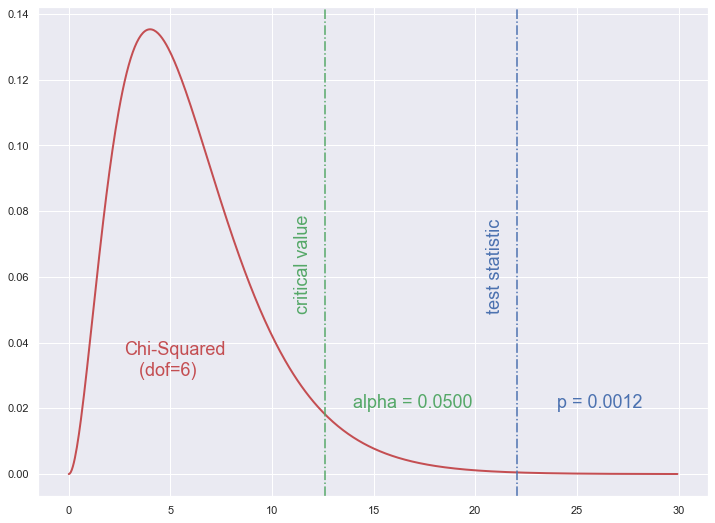

In [8]:
from scipy.stats import chi2
plt.figure(figsize=(12, 9))

# Choose the significance level and find the critical value
prob = 0.95
critical = chi2.ppf(prob, dof)

# Build X axis
x = np.arange(0, 30, .05)

# Draw the chi-squared pdf witht he appropriate dof
ax = sns.lineplot(x=x, y=chi2.pdf(x, df=np.prod(data_crosstab.shape) - np.sum(data_crosstab.shape) + 1), color='r', lw=2)
ax.text(2.7, 0.03, f'Chi-Squared\n   (dof={dof})', fontsize=18, color='r')

# Draw the test statistics
ax.axvline(chi_stat, ls='-.', color='b', label='test-statistic')
ax.text(chi_stat-1.5, 0.05, "test statistic", fontsize=18, rotation='vertical', color='b')
ax.text(24, 0.02, f"p = {p:.4f}", fontsize=18, color='b')

# Draw the line leaving behind 95% of the area under the curve
ax.axvline(critical, ls='-.', color='g', label='critical-value')
ax.text(critical-1.5, 0.05, "critical value", fontsize=18, rotation='vertical', color='g')
ax.text(14, 0.02, f"alpha = {1-prob:.4f}", fontsize=18, color='g')

plt.show()

In the picture above, we see values for the critical value and p-value. The p-value measures how likely we are to observe a test statistic more extreme than what we already observed. Since the p-value is smaller than the critical value we previously set, we end up rejecting the $H_0$, hence, we state that the two random variables are **NOT** independent.

(appendix:oversampling)=
## 3. Oversampling

The two most common oversampling techniques are **SMOTE** and **ADASYN**.
Both techniques are based on the same oversampling algorithm:

$${\displaystyle x_{new} = x_i + \lambda \times (x_{zi} - x_i)}$$

where:
* $x_{new}$ is the newly generated point
* $x_i$ is a point from the orginal dataset
* $x_{zi}$ is the $z_{th}$ nearest neighbor of $x_i$

We are basically finding a new point as an interpolation of each point and one of it's nearest neighbors.
The main issue is that approach only works with continuous features.
Since we are required to deal with continuous features *as well as* categorical features, we have to choose SMOTE, since ADASYN does not offer any solutions for the problem.

### 3.1. **SMOTE** for continuous values

As we just said, SMOTE for contiuous values is pretty straight forward:

1. Determine the oversampling ratio for each point in the minority class
2. For each minority point:
    1. Find $k$ nearest neighbors
    2. Choose $n$ of the $k$ neighbors and compute the new point coordinates
    3. Add the new points to the dataset

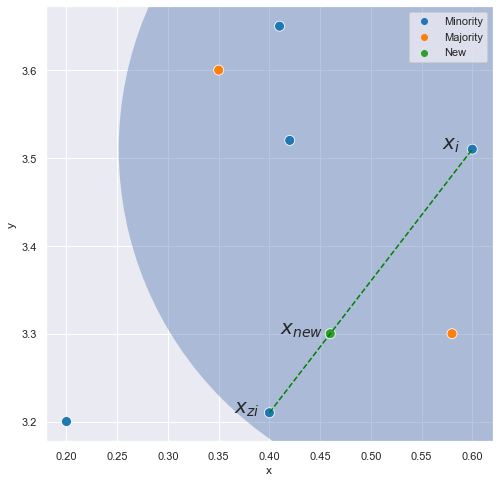

In [9]:
# Create fake data
x = [0.2, 0.4, 0.41, 0.42, 0.6, 0.6, 0.35, 0.58]
y = [3.2, 3.21, 3.65, 3.52, 3.51, 3.51, 3.6, 3.3]
c = ['Minority', 'Minority', 'Minority', 'Minority', 'Minority', 'Minority', 'Majority', 'Majority']
a = [1, 1, 1, 1, 1, 0.4, 1, 1]
l = 0.7

df = pd.DataFrame({'x': x, 'y': y, 'c': c, 'a': a})

# Build the new interpolated point
df = df.append(
    {'x': df.loc[5, 'x'] + l * (df.loc[1, 'x'] - df.loc[5, 'x']),  
     'y': df.loc[5, 'y'] + l * (df.loc[1, 'y'] - df.loc[5, 'y']),
     'c': 'New',
     'a': 1}, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

size = 500000
# Draw the neighbourhood
sns.scatterplot(x='x', y='y', data=df[df['a']==0.4], hue='c', s=size, alpha=0.4, ax=ax, linewidth=0, legend=False)
# Draw the interpolation line
sns.lineplot(x=[x[1], x[5]], y=[y[1], y[5]], linestyle='--', color='green', ax=ax, legend=False)
# Draw points
sns.scatterplot(data=df.drop(5), x='x', y='y', hue='c', s=100, ax=ax, palette="tab10")

# Some text
ax.text(x[5]-0.03, y[5], "$x_i$", fontsize=20)
ax.text(x[1]-0.035, y[1], "$x_{zi}$", fontsize=20)
ax.text(df.iloc[-1]['x']-0.05, df.iloc[-1]['y'], "$x_{new}$", fontsize=20)
plt.legend()
plt.show()

### 3.2. **SMOTE** for categorical values

Since it is not possible to interpolate categorical features, we can extend SMOTE to deal with this kind of data.
The way the *imblearn* library does it is by adopting a *majority voting* technique among the k nearest neighbors of any given point.

## 4. Learning Theory

In order to understand the meaning behind some procedures like *Training-Test Data Split* or *Cross Validation* we must give a brief introduction to some basic concepts of learning theory.

### 4.1 Statistical Learning Framework

Let's start by defining some important terms that we will need in the following chapters:

* Learner: The Machine Learning algorithm
* Domain set: The set of observations that we want to label $\mathcal{X}$ (in our case, the set of session recorded)
* Label set: The set of possible labels $\mathcal{Y}$ (in our case, $\{0, 1\}$)
* Training data: A finite sequence of labeled domain points $S = \left( \left(  \mathcal{x}_1, \mathcal{y}_1 \right) \dots \left( \mathcal{x}_m, \mathcal{y}_m \right) \right)$
* Learner's output: The prediction rule obtained by the learner, trained on Training data $\mathcal{h} : \mathcal{X} \rightarrow \mathcal{Y}$ 
* Data-Generating model: The probability distribution $\mathcal{D}$ underlying $\mathcal{X}$ and the *correct* labelling function $\mathcal{f}\ \text{s.t.}\ \mathcal{f}\left(\mathcal{x}_i\right)=\mathcal{y}_i$
* Measure of success: The error of a prediction rule $\mathcal{h} : \mathcal{X} \rightarrow \mathcal{Y}$  

$$L_{\mathcal{D}, f}(h) \stackrel{\text { def }}{=} \underset{x \sim \mathcal{D}}{\mathbb{P}}[h(x) \neq f(x)] \stackrel{\text { def }}{=} \mathcal{D}(\{x: h(x) \neq f(x)\})$$

Meaning that the error of $\mathcal{h}$ is the probability of randomly choosing an example $\mathcal{x}$ for which the prediction rule disagrees from the labelling function.


### 4.2 The Empirical Risk

The goal of our learner (algorithm) is to find the best predictor $h$. The goodness of the predictor is measured by means of the *error*. The main problem is that the error we just defined depends on the true data distribution $\mathcal{D}$ and the labelling function $\mathcal{f}$, and both are not accessible by the learner.

All that our learner sees is the training set *S*, which works like a small window on the real world $D$ that he will never able to experience. For this reason, we are only able to build an approximation of that error, we call it *Empirical Error (Risk)*

$$L_{S}(h) \stackrel{\text { def }}{=} \frac{\left|\left\{i \in[m]: h\left(x_{i}\right) \neq y_{i}\right\}\right|}{m}$$

That is, the ratio of examples in which our rule agrees with with the labelling function. Consequently, we train our learner by minimizing the *Empirical Risk*, a process called **Empirical Risk Minimization (ERM)**

### 4.3 Overfitting

The **ERM** technique, although very intuitive, may lead to overfitting.

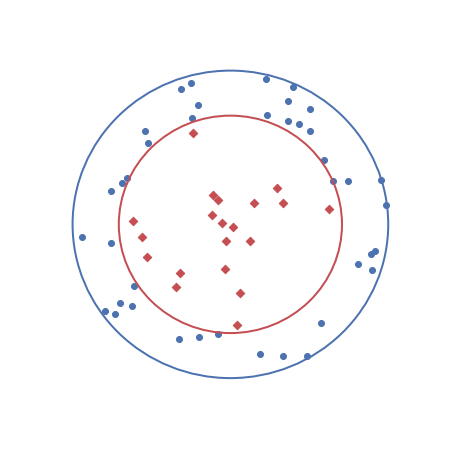

In [10]:
n_inner_points = 20
n_outer_points = 40
np.random.seed(42)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

# Outer boundary
outer_circle = plt.Circle((0, 0), np.sqrt(2), color='b', fill=False, lw=2)
ax.add_patch(outer_circle)
# Inner boundary
inner_circle = plt.Circle((0, 0), 1, color='r', fill=False, lw=2)
ax.add_patch(inner_circle)

# Plot outer samples
angle_outer = np.random.rand(1, n_outer_points) * 2 * np.pi
radius_outer = np.random.rand(1, n_outer_points) * (np.sqrt(2)  - 1) + 1
ax.scatter(radius_outer * np.cos(angle_outer), radius_outer * np.sin(angle_outer), c='b')
# Plot inner samples
angle_inner = np.random.rand(1, n_inner_points) * 2 * np.pi
radius_inner = np.random.rand(1, n_inner_points)
ax.scatter(radius_inner * np.cos(angle_inner), radius_inner * np.sin(angle_inner), marker='D', c='r')

plt.axis('off')
plt.show()

Let's imagine a bivariate dataset, where the $\mathcal{D}$ is the uniform distribution in the blue circle, and the labelling function $\mathcal{f}$ determines the label to be 1 if the sample falls inside the red circle, 0 otherwise. (Note that the area of the red circle is $\pi$ while the area of the blue circle is $2\pi$)

Now consider the predictor:

$$h_{S}(x)= \begin{cases}y_{i} & \text { if } \exists i \in[m] \text { s.t. } x_{i}=x \\ 0 & \text { otherwise. }\end{cases}$$

Which essentially is remembering by heart the training samples, and guessing label 0 for every unknown sample. This predictor has *empirical risk* $L_{\mathcal{S}}(h_s) = 0$, for this reason it can be chosen by an ERM algorighm. But if we take a look at the *true risk* (we can do it only because we built the underlying distribution ourselves) is $L_{\mathcal{D}}(h_s) = \frac{1}{2}$

We have found a predictor that performs perfectly on the training set, and very poorly on the "true world".

### 4.4. Recrifying Overfitting

We have just shown that $\operatorname{ERM}$ is sensible to overfitting, we will now introduce some conditions to $\operatorname{ERM}$ that will guardantee us that if our predictor has good performance on the training set, it is *highly likely* to perform *well* over the underlying data distribution $\mathcal{d}$.

#### 4.4.1 Finite Hypothesis Classes
A common solution to overfitting is to limit the search space of the $\operatorname{ERM}$. This means choosing an hypothesis class *in advance*, over which the $\operatorname{ERM}$ will look for our best predictor *h*

$$h_S = \operatorname{ERM}_{\mathcal{H}}(S) \in \underset{h \in \mathcal{H}}{\operatorname{argmin}} L_{S}(h)$$

We call $\mathcal{H}$ *Hypothesis class*, and our $\operatorname{ERM}$ now aims at finding the best $\mathcal{h} \in \mathcal{H}$ that minimizes the $\operatorname{ERM}$. Although this reduces overfitting, we are practically steering our $\operatorname{ERM}$ towards a predefinet set of predictors, hence we are introducing a form of bias called *inductive bias*.

#### 4.4.2 Realizability Assumption
A further assumption that we have to make is the following:

$$\exists \mathcal{h}^* \in \mathcal{h}\ \operatorname{s.t.}\ L_{\left(\mathcal{D}, \mathcal{f}\right)}\left(h^*\right)=0$$

This means that there always exists an hypothesis in our finite hypothesis set, for which the True Error is zero. This implies
1. $\mathcal{D}^{\mathcal{m}}\left(S:L_S\left(h^*\right)=0\right)=1$ with probability 1, over the random samples $S$ sampled according to $\mathcal{D}$, labelled by $\mathcal{f}$, we have that the empirical error of $h^*$ equals 0
2. $L_S\left(h_S\right)=0$ for every $\operatorname{ERM}$ hypothesis, the empirical risk equals 0

#### 4.4.3 I.I.D. Assumption
The last assumption is that the samples in the training set are *independently and indentically distributed* according to $\mathcal{D}$

#### 4.4.4 Putting it all together
Since the training set is random, there is always a (small) probability that our sample is unrepresentative of the underlying $D$, We denote such probability as $\delta$, and call $\left(1-\delta\right)$ the *confidence* of our prediction. Furthermore, since we can not guarantee a perfect prediction, we introduce the *accuracy* $\epsilon$. We now are able to define the failure of our learner as $L_{\left(\mathcal{D}, \mathcal{f}\right)}\left(h_S\right) > \epsilon$.

We are now interested in finding an upper bound to the probability of sampling an m-tuple of instances that will lead to faliure in learning a good predictor. The quantity we want to upper bound is

$$\mathcal{D^m}\left(\{ S|_x : L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon\}\right)\tag{1}$$

where $S|_x=\left(x_1, \dots, x_m\right)$ are the instances of the training set.

Let:
* $\mathcal{H_B}$ be the set of "*bad*" hypothesis $\mathcal{H_B}=\{h \in \mathcal{H}:L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon\}$. $\mathcal{H_B}$ is the set of hypothesis that leads to learner's failure (N.B. defined with respect to the **True** error).
* $M$ be the set of "*misleading*" samples $M=\{S|_x:\exists h \in \mathcal{H}_B, L_S\left(h\right)=0\}$. $M$ is the set of samples, for which a bad hypothesis (high *true* error) has a low *empirical* error.

Recall:
* We are trying to bound $\mathcal{D^m}\left(\{ S|_x : L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon\}\right)$

Consider:
* The realizability assumption implies that: $L_S\left(h_S\right)=0$ 

This means that $L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon$ can only happend if for some  $h \in \mathcal{H}_B$ we have $L_S\left(h\right)=0$.

This is because, being the $h_S$ an $\operatorname{ERM}$ hypothesis, it will be chosen if $L_S=0$ (realizability assumption). Now, the only way we are going to have learner's failure ($L_{\left(\mathcal{D}, \mathcal{f}\right)}\left(h_S\right) > \epsilon$) is for us to select a misleading sample, since it's the only way our learner will fail, having a 0 empirical risk.

We can now say that the event above will only happen if our sample is in the set $M$ of bad hypothesis.

We have shown that:

$$\{S|_x:L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon \} \subseteq M$$

(meaning that the set of samples for which we have learner's failure is bounded by the size of the set of misleading samples)

Hence:

$$\mathcal{D^m}\left(\{S|_x:L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon \}\right) \leq \mathcal{D^m}\left(M\right)\tag{2}$$

(The probability of picking a sample that brings learner's failure is bounded by the probability of picking a misleading sample)

Consider:
* The equation $M=\{S|_x:\exists h \in \mathcal{H}_B, L_S\left(h\right)=0\}=\underset{h\in\mathcal{H}_B}{\bigcup}\{S|_x:L_S\left(h\right)=0\}$

(The size of the set $M$ is the union of all those misleading samples that make the bad hypothesis have 0 empirical risk)

Then

$$\mathcal{D^m}\left(\{S|_x:L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon \}\right)\leq\mathcal{D^m}\left(\underset{h\in\mathcal{H}_B}{\bigcup}\{S|_x:L_S\left(h\right)=0\}\right)\tag{3}$$

(The probability of failure is bounded by the probability of sapling such bad sample)

Consider:
* The union bound $\mathcal{D}\left(A \cup B\right) \leq \mathcal{D}\left(A\right) +\mathcal{D}\left(B\right)$

Then

$$\mathcal{D^m}\left(\{S|_x:L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon \}\right) \leq \underset{h\in\mathcal{H}_B}\sum{\mathcal{D^m}\left(S|_x:L_S\left(h\right)=0\right)}\tag{4}\label{eq:4}$$

Now, let's bound each single summand on the right side.

Fix:
* $h \in \mathcal{H_B}$

Consider:
* The event $L_S\left(h\right)=0$ indicates the case where our predictor $h$ always agrees with the true labelling $f$, formally $\forall{i}, h\left(x_i\right)=\mathcal{f}\left(x_i\right)$

Then

$$\mathcal{D^m}\left(S|_x:L_S\left(h\right)=0\right)=\mathcal{D^m}\left(\{S|_x:\forall{i}, h\left(x_i\right)=\mathcal{f}\left(x_i\right)\right\})$$

Consider:
* The training samples are i.i.d. 

Then 

$$\mathcal{D^m}\left(\{S|_x:\forall{i}, h\left(x_i\right)=\mathcal{f}\left(x_i\right)\right\})=\underset{i=1}{\overset{m}{\prod}} \mathcal{D}\left(\{\mathcal{x}_i:h\left(\mathcal{x}_i\right)=\mathcal{f}\left(\mathcal{x}_i\right)\}\right)$$

Remember:
* The definition of true risk: $L_{\mathcal{D}, f}(h) \stackrel{\text { def }}{=} \mathcal{D}(\{x: h(x) \neq f(x)\})$

Then, for each individual sampling of an element of the training set we have 

$$\mathcal{D}\left(\{\mathcal{x_i}:h\left(\mathcal{x_i}\right)=\mathcal{y_i}\}\right) = 1 - L_\left(\mathcal{D}, \mathcal{f}\right)\left(h\right) \leq 1 - \epsilon$$

Where the last inequation follows from the fact that we are condidering only bad hypothesis $h \in \mathcal{H_B}$

Consider:
* the inequality $\left(1 - \epsilon\right)^m \leq e^{-\epsilon m}$

We now have proved that:

$$\mathcal{D^m}\left(S|_x:L_S\left(h\right)=0\right) \leq (1-e)^m \leq e^{-\epsilon m}$$

Now, sostituting back in equation $\left(\ref{eq:4}\right)$ we get

$$\mathcal{D^m}\left(\{S|_x:L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon \}\right) \leq \left|\mathcal{H_B}\right|e^{-\epsilon m}\tag{5}$$

Consider:
* $\left|\mathcal{H_B}\right| \leq \left|\mathcal{H}\right|$

We conclude that

$$\mathcal{D^m}\left(\{S|_x:L_{\left(\mathcal{D},\mathcal{f}\right)}\left(h_S\right)>\epsilon \}\right) \leq \left|\mathcal{H}\right|e^{-\epsilon m}\tag{6}$$

**---**


Let 
* $\mathcal{H}$ be a finite hypothesis class
* $\delta \in \left(0, 1\right) \text{and} \epsilon > 0$
* $m$ be an integer that satisfies $m \geq \frac{\log (|\mathcal{H}| / \delta)}{\epsilon}$

Then, for any labeling function $\mathcal{f}$ and for any distribution $\mathcal{D}$ for which the realizability assumption holds, with probability at least $1 - \delta$ over the choice of an i.i.d. sample $S$ of size $m$, we have that for every $\operatorname{ERM}$ hypothesis $h_S$, it holds that

$$L_{\left(\mathcal{D}, \mathcal{f}\right)}\left(H_S\right)\leq \epsilon$$

The above statements mean that, for a training set of size $m$ (*big enough*) and a **finite** hypothesis set $\mathcal{H}$, the $\operatorname{ERM_{\mathcal{H}}}$ rule will be *probably* (with confindence $1 - \delta$) *approximately* (up to an error $\epsilon$) correct. 

### 4.5. PAC Learning

In the paragraph above we found out that for a finite hypothesis class, if the sample size $m$ of the training set $S$ that we feed to the $\operatorname{ERM}$ in order to find our hypothesis $h_S$ is **big enough**, then our $h_S$ will be **probably approximately correct**.

We can now define PAC Learnability as follows:

```{admonition} PAC Learning
:class: important
A hypothesis class $\mathcal{H}$ is PAC learnable if there exists a function $m_{\mathcal{H}}:(0,1)^{2} \rightarrow \mathbb{N}$ and a learning algorithm that has the following properties $\forall \epsilon,\delta\in\left(0, 1\right), \forall \mathcal{D}\sim\mathcal{X}, \forall \mathcal{f}:\mathcal{X}\rightarrow\left(0, 1\right)$ if the realizability assumption holds w.r.t. $\mathcal{H,D,f}$ then when running the learning algorithm on $m \geq m_\mathcal{H}\left(\epsilon,\theta\right)$ i.i.d. samples generated by $\mathcal{D}$ and labelled by $\mathcal{f}$ the algorighm returns a hypothesis $h$ such that with probability of at least $1-\theta$ (probably) $L_{\left(\mathcal{D}, \mathcal{f}\right)}\left(h\right)\leq\epsilon$ (approximately correct)
```

It is important to note that if $\mathcal{H}$ is PAC learnable, there exists mode than 1 function $m_H$ that satisfies the requirements for PAC learnability. Therefore, we will redefine the sample complexity to be the minimal integer that satisfies the requirements of PAC learning:

$$m_{\mathcal{H}}(\epsilon, \delta) \leq\left\lceil\frac{\log (|\mathcal{H}| / \delta)}{\epsilon}\right\rceil$$

### 4.6 Generalizing the model - Removing the Realizability Assumption

The first step towards the generalization of the model is to remove the realizability assumption. Remember, the realizabilty assumption says that $\exists h^*\in\mathcal{H}:\mathcal{D}\left(\{h_*\left(\mathcal{x}\right)=\mathcal{f}\left(\mathcal{x}\right)\}\right)=1$. In many real problems, this is not the case. Furthermore, it is also unrealistic to suppose that the labels are fully determined by the labelling function $\mathcal{f}$.

For this reason, from now on, we indicate the probablity distribution over $\mathcal{X} \times \mathcal{Y}$, were 
* $\mathcal{X}$ is our domain set as before, $\mathcal{D_x}$ is the marginal over the unlabeled domain points
* $\mathcal{Y}$ is a set of labels, $\mathcal{D\left(\left(x, y\right)|x\right)}$ is the conditional over the labels for each domain point

This makes $\mathcal{D}$ a *joint probability distribution* over the domain points and the labels.

We can now rewrite some of the concept that we defined previously:
* **True Error**: $L_\mathcal{D}\left(h\right) \overset{\operatorname{def}}{=} \mathcal{D}\left(\{\left(\mathcal{x, y}\right): h\left(\mathcal{x}\right)\neq\mathcal{y}\}\right)$
* **Empirical Error**: $L_{S}(h) \stackrel{\text { def }}{=} \frac{\left|\left\{i \in[m]: h\left(x_{i}\right) \neq y_{i}\right\}\right|}{m}$

We can now replace the realizability assumption by considering the following example:

Given a probability distribution $\mathcal{D}$ over $\mathcal{X} \times \{0, 1\}$, the best label predicting function from $\mathcal{X}$ to $\{0, 1\}$ is:

$$f_{\mathcal{D}}(x)= \begin{cases}1 & \text { if } \mathbb{P}[y=1 \mid x] \geq 1 / 2 \\ 0 & \text { otherwise }\end{cases}$$

The above classifier is called *Bayes classifier*, and it is the optimal predictor for every $\mathcal{D}$, formally

$$\forall g \ L_\mathcal{D}\left(\mathcal{f_D}\right)\leq L_\mathcal{D}\left(\mathcal{g}\right)$$

However, the *Bayes Risk* can not once more be computed, as it depends on $\mathcal{D}$. Since we can not hope to find a predictor that has a smaller error than the minimal possible (the one of the Bayes classifier), we require that the learning algorithm will find a predictor whose error is *not much larger* than the best possible error of a predictor *in some given benchmark hypothesis class*

```{admonition} Agnostic PAC Learning 
:class: important
A hypothesis class $\mathcal{H}$ is **agnostic** PAC learnable if there exists a function $m_{\mathcal{H}}:(0,1)^{2} \rightarrow \mathbb{N}$ and a learning algorithm that has the following property: $\forall \epsilon,\theta\in\left(0, 1\right), \forall \mathcal{D}\sim\mathcal{X}\times\mathcal{Y}$, when running the learning algorithm on $m \geq m_\mathcal{H}\left(\epsilon,\delta\right)$ i.i.d. samples generated by $\mathcal{D}$ the algorighm returns a hypothesis $h$ such that, with probability of at least $1-\delta$ 

$$L_\mathcal{D}\left(h\right)\leq \underset{h^\prime\in\mathcal{H}}{\operatorname{min}} L_\mathcal{D}\left(h^\prime\right) +\epsilon$$
```

With the above definition we have relaxed the PAC learnable property, by removing the requirement for the learner to have a small error in absolute terms, and compared it to the best learner among the class of predictors that we choose.

### 4.7 Generalizing the model - Extending further than Binary Classification

The next relaxation we are going to perform over our model concerns the scope of the Learning Problem. To give an idea of what it means, let's consider some examples of different learning tasks:

* Multiclass Classification: We do not require for our classification to be binary. We could think of document classification, where our $\mathcal{X}$ is the set of all documents, and our $\mathcal{Y}$ is a large but finite set (e.g. Sport, Polithics, Kitchen, News). Our training sample still looks exactly the same as previously discussed, a finite sequence of pairs $\mathcal{(x_i, y_i)}$, and the learner's output will still be a function $h_S:\mathcal{X}\rightarrow\mathcal{Y}$. As a metric we can use the probability, over pairs, that our predictor suggests a wrong label.
* Regression: In regression, the goal is to find a functional relationship between $\mathcal{X}$ and $\mathcal{Y}$. For example, one could want to find a linear function that predicts a child's weight at birth give some ultrasound measurements (e.g. head circumference, abdominal circumference and femur length). Our $\mathcal{X} \in \mathbb{R}^3$ and the labels set, is the set of real numbers. Our training data still looks the same even in this task (a pair $\mathcal{\left(x_i, y_i\right)}$). However, the measure of success differs. We may evaluate the qualityb of a hypothesis function $h_S:\mathcal{X}\rightarrow\mathcal{Y}$ using the *expected square difference* between the true labels and the predictor's outputs:

$$L_\mathcal{D}\left(h\right) \overset{\operatorname{def}}{=} \underset{\mathcal{\left(x, y\right)\sim D}}{\mathbb{E}} \left(h\left(\mathcal{x}\right)-\mathcal{y}\right)^2$$

For this reason, we generalize our measure of success as follows:

```{admonition} Generalized Loss Function
:class: important
Given any set $\mathcal{H}$ and some domain $Z$ let $l$ be any function $\ell:\mathcal{H}\times Z \rightarrow \mathbb{R}_+$ we call such functions *loss functions*. (for classification problems, $Z=\mathcal{Z\times Y}$)
```

We can again rewrite the definitions of true and empirical risk

We can now rewrite some of the concept that we defined previously:
* **True Risk**: $L_\mathcal{D}\left(h\right) \overset{\operatorname{def}}{=} \underset{\mathcal{z\sim D}}{\mathbb{E}}\left[\ell\left(\mathcal{h, z}\right)\right]$ (The risk is the expected value of the loss)
* **Empirical Error**: $L_{S}(h) \overset{\operatorname{def}}{=} \frac{1}{m} \overset{m}{\underset{i=1}{\sum}}\ell\mathcal{\left(h,z_i\right)}$ where $S=\mathcal{\left(z_1,\dots,z_m\right)\in Z_m}$

Let's now write the loss for classification and regression tasks:

* **0-1 Loss** 

$$\ell_{0-1}(h,(x, y)) \stackrel{\text { def }}{=} \begin{cases}0 & \text { if } h(x)=y \\ 1 & \text { if } h(x) \neq y\end{cases}$$

* **Square Loss**

$$\ell_{sq}\left(h, \left(\mathcal{x, y}\right)\right) \overset{\operatorname{def}}{=} \left(h\left(\mathcal{x}\right)-\mathcal{y}\right)^2$$

To summarize:

```{admonition} Agnostic PAC Learning for Genearl Loss Functions
:class: important
A hypothesis class $\mathcal{H}$ is **agnostic** PAC learnable with respect to a set $Z$ and a loss function $\ell:\mathcal{H}\times Z\rightarrow \mathbb{R}_+$ if there exists a function $m_{\mathcal{H}}:(0,1)^{2} \rightarrow \mathbb{N}$ and a learning algorithm that has the following property: $\forall \epsilon,\theta\in\left(0, 1\right), \forall \mathcal{D}\sim>$, when running the learning algorithm on $m \geq m_\mathcal{H}\left(\epsilon,\delta\right)$ i.i.d. samples generated by $\mathcal{D}$ the algorighm returns a hypothesis $h$ such that, with probability of at least $1-\delta$ (over
the choice of the m training examples) 

$$L_\mathcal{D}\left(h\right)\leq \underset{h^\prime\in\mathcal{H}}{\operatorname{min}} L_\mathcal{D}\left(h^\prime\right) +\epsilon$$

where $L_\mathcal{D}\left(h\right) = \mathbb{E}_{\mathcal{z\sim D}}\left[\ell\left(\mathcal{h, z}\right)\right]$
```

### 4.8 Uniform Convergence

Recall the $\operatorname{ERM}$ paradigm given a hypothesis class $\mathcal{H}$:
1. The $\operatorname{ERM}$ recieves a training sample $S$
2. The learner evaluates the *empirical* risk of each $h \in\mathcal{H}$ over the training sample $S$
3. The learner outputs an $h$ that minimizes the *empirical* risk.

We then hope that this $h_S$ is also a risk minimizer with respect to the *true data probability distribution* $\mathcal{D}$. For that, it is enough to ensure that the empricial risk of all members of $\mathcal{H}$ are good approximations of their true risk.

```{admonition} $\epsilon$-representative sample
:class: important
A training set $S$ is called $\epsilon$-representative (w.r.t. domain $Z$, hypothesis class $\mathcal{H}$, loss function $\ell$, and distribuyion $\mathcal{D}$) if

$$\forall{h}\in\mathcal{H},\ \left|L_S\left(h\right)-L_D\left(h\right)\right|\leq{\epsilon}$$

```

Now assume that a training set $S$ is $\frac{\epsilon}{2}$-representative, then any output of $\operatorname{ERM}_\mathcal{H}\left(S\right)$, namely, any $h_S\in \underset{h\in\mathcal{H}}{\operatorname{argmin}}L_S\left(h\right)$ satisfies

$$L_D\left(h_S\right) \leq \underset{h\in\mathcal{H}}{\operatorname{min}} L_D\left(h\right) + \epsilon$$

Proof:

$$L_{\mathcal{D}}\left(h_{S}\right) \overset{1}{\leq} L_{S}\left(h_{S}\right)+\frac{\epsilon}{2} \overset{2}{\leq} L_{S}(h)+\frac{\epsilon}{2} \overset{3}{\leq} L_{\mathcal{D}}(h)+\frac{\epsilon}{2}+\frac{\epsilon}{2}=L_{\mathcal{D}}(h)+\epsilon,$$

Where:
* $1$ and $3$ hold because $S$ is $\epsilon$-representative: $\left|L_S\left(h\right)-L_D\left(h\right)\right|\leq{\epsilon}$
* $2$ holds because $h_S$ is an $\operatorname{ERM}$ predictor (the hypothesis which yields the minimum empirical risk)

We can now say that to ensure that the $\operatorname{ERM}$ rule is an agnorstic PAC learner, it is enough to show that with probability of at least $1-\theta$ over the random choice of a training set, it will be an $\epsilon$-representative training set.

As we introduced $m_\mathcal{H}\left(\delta, \epsilon\right)$ for PAC learning, which told us the minimum sample complexity needed in order to **approximately** have (with confidence $1-\theta$) a **correct** learner (up to an error $\epsilon$), we now introduce 

$$m^{UC}_\mathcal{H}:\left(0, 1\right)^2\rightarrow\mathbb{N}$$


```{admonition} Uniform Convergence
:class: important
We say that a hypothesis class $\mathcal{H}$ has the *uniform convergence* property (w.r.t a domain $Z$ and a loss function $\ell$) if there exists a function $m^{UC}_\mathcal{H}:\left(0, 1\right)^2\rightarrow\mathbb{N}$ such that for every $\epsilon,\delta\in\left(0, 1\right)$ and for every probability distribution $\mathcal{D}$ over $Z$, if $S$ is a sample of $m \geq m^{UC}_\mathcal{H}\left(\epsilon,\theta\right)$ examples, drawn i.i.d. according to $\mathcal{D}$, then, with probability of at least $1-\delta$, $S$ is $\epsilon$-representative (which in turn means that the $\operatorname{ERM}$ rule is an agnostic PAC learner)
```

it follows that if a class $\mathcal{H}$ has the uniform convergence property (meaning that for each $h\in\mathcal{H}$ the there exists a function that gives us the minimum sample complexity that, with proability $1-\delta$ over the sampling of the domain set, gives us a training set $S$ which is $\epsilon$-representative) with a function $m^{UC}_\mathcal{H}$ then the class is agnostically PAC learnable with sample complexity $m_\mathcal{H}\left(\epsilon,\delta\right) \leq m^{UC}_\mathcal{H}\left(\epsilon /2, \delta\right)$. Furthermore, in that case, the $\operatorname{ERM}_\mathcal{H}$ paradigm is a succesful agnostic PAC learner for $\mathcal{H}$

### 4.8 Recap

Below is a recap of the most important results achieved during this brief introduction

![resume](images/pac.png)

### 4.8 VC-dimension

The *Vapnik-Chervonenkis*(VC)-dimension is a property of a hypothesis class that gives the correct characterization of its learnability. In order to define the VC-dimension we first need to define a preliminary notion called *shattering*

```{admonition} Shattering
:class: important
Let $\mathcal{H}$ be a class of $\{0, 1\}$ functions over some domain $\mathcal{X}$ and let $A\subseteq\mathcal{X}$. We say that $\mathcal{H}$ shatters $A$ if $\forall \mathcal{g}:A\rightarrow\{0, 1\} \exists h\in\mathcal{H}\ \operatorname{s.t.}\ \forall \mathcal{x} \in A,\ h\left(\mathcal{x}\right) = g\left(\mathcal{x}\right)$
```

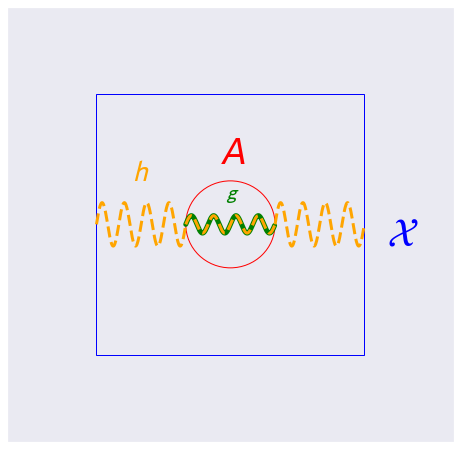

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as mpath

sns.set_style("darkgrid")

# fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Domain X
ax.add_patch(patches.Rectangle((2, 2), 6, 6, fc='none', ec='blue'))
ax.text(8.5, 4.5, '$\mathcal{X}$', fontsize=40, color='blue')

# Subset A
ax.add_patch(patches.Circle((5, 5), 1, fc='none', ec='red'))
ax.text(4.8, 6.4, '$A$', fontsize=35, color='red')

# 0-1 behaviour over A
x_a = np.arange(4, 6, 0.01);
y_a = np.sin(x_a*(4*np.pi))*0.2 + 5
ax.plot(x_a, y_a, color='green', linewidth=5)
ax.text(4.9, 5.6, '$\mathcal{g}$', fontsize=20, color='green')

# 0-1 behaviour over X
x_x_left = np.arange(2, 4, 0.01)
y_x_left = np.sin(x_x_left*(4*np.pi))*0.5 + 5
ax.plot(x_x_left, y_x_left, color='orange', linestyle='--', linewidth=3)

x_a = np.arange(4, 6, 0.01);
y_a = np.sin(x_a*(4*np.pi))*0.2 + 5
ax.plot(x_a, y_a, color='orange', linestyle='--', linewidth=3)

x_x_right = np.arange(6, 8, 0.01)
y_x_right = np.sin(x_x_right*(4*np.pi))*0.5 + 5
ax.plot(x_x_right, y_x_right, color='orange', linestyle='--', linewidth=3)

ax.text(2.8, 6, '$\mathcal{h}$', fontsize=30, color='orange')
# Amplitude of the sine wave is sine of a variable like time


plt.ylim((0, 10))
plt.xlim((0, 10))
ax.set_yticks([])
ax.set_xticks([])
plt.show()

In the figure above we can see a (green) function $\mathcal{g}:A\rightarrow\{0, 1\}$ that represents a $\{0, 1\}$ behaviour over $A$. And a function $h$ defined over the domain $\mathcal{X}$ that agrees with the function $g$ over the set of points $A$.


```{admonition} Meaning of $\{0, 1\}$ behaviour
:class: note
$\{0,1\}$ behaviour in this settings means "*a way of splitting the set A in two subsets*"
```

```{admonition} Function-Set duality
:class: note
There is equivalence between functions $\mathcal{h}:\mathcal{X}\rightarrow\{0, 1\}$ and subsets $A\subseteq\mathcal{X}$. Given any $\mathcal{h}$ I can define a set 

$$\forall{h}:\mathcal{X}\rightarrow\{0, 1\}\exists A_{\mathcal{h}}=\{\mathcal{x}\in\mathcal{X}:\mathcal{h}\left(\mathcal{x}\right)=1\}$$

The relationship also works in the opposite direction: 

$$\forall{A}\subseteq\mathcal{X}\ \exists h_A\left(\mathcal{x}\right)=\begin{cases}1 & \text { if } x\in A \\ 0 & \text { if } x \notin A \end{cases}$$
```

We can now define the VC-Dimension


```{admonition} Vapnik-Chervonenkis dimension
:class: important
The VC-dimension of a class $\mathcal{H}$ is defined as the size of the maximal shattered set.

$$ \operatorname{VCdim}\left(\mathcal{H}\right)\overset{\operatorname{def}}{=}\underset{A \operatorname{shattered by} \mathcal{H}}{\operatorname{max}} \left\lvert A\right\rvert $$

```

```{admonition} How to compute VC of $\mathcal{H}$
:class: note
* If I claim that $\operatorname{VCdim}\left(\mathcal{H}\right)\geq n$ then I have to find at least 1 set of size $n$ which is shattered
* If I claim that $\operatorname{VCdim}\left(\mathcal{H}\right)< n$ then I have to show that no matter how I pick $n$ points, they will never be shattered by $\mathcal{h}$
```

## 5. K-Fold Cross Validation

The k-fold cross validation technique is designed to provide an accurate estimate of the true error without wasting too much data (as it happens in regular validation techniques). This method consists in dividng the original training dataset of size $m$, into $k$ subsets of size $m/k$. Once for each fold, a fold gets removed from the starting set and used as validation, while the remaining $k-1$ are used to train the model. Finally, the average of the empirical error computed on each fold is computed and considered as the average estimate of the true error. Usually, k-fold is used to perform model selection, and once the final model is found, it is then re-trained on the whole training set.